In [1]:
import eighta_lib as ea

In [2]:
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from umap import UMAP
from sklearn.decomposition import PCA

sns.set(style='white', context='notebook')

c:\Users\timo\.conda\envs\sp-lib\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
RESULTS_FILE = "out/results/GAT_2024-05-23-16-24-07_results copy.h5ad"  # No-Graph model
RESULTS_FILE_GAT = "out/results/GAT_2024-05-23-16-23-45_results copy.h5ad"  # GAT model

adata = ea.BackedAnnData(RESULTS_FILE)
adata_gat = ea.BackedAnnData(RESULTS_FILE_GAT)

In [20]:
len(adata.obs["Donor ID"].unique())

339

In [4]:
adata_obs = pd.DataFrame({
    "Donor ID": adata.obs["Donor ID"].values,
    "cogdx": adata.obs["cogdx"].values,
    "braaksc": adata.obs["braaksc"].values,
    "ceradsc": adata.obs["ceradsc"].values
})

In [5]:
ddata = adata_obs.groupby("Donor ID").first()
ddata["Donor ID"] = ddata.index

wang_labels = []
for i, donor in enumerate(ddata.index):
    cogdx = ddata["cogdx"].values[i]
    braaksc = ddata["braaksc"].values[i]
    ceradsc = ddata["ceradsc"].values[i]
    
    if cogdx == 4 and braaksc >= 4 and ceradsc <= 2:
        wang_labels.append("AD")
    elif cogdx == 1 and braaksc <= 3 and ceradsc >= 3:
        wang_labels.append("CT")
    else:
        wang_labels.append("Other")
ddata["wang_label"] = wang_labels

In [21]:
ddata["wang_label"].value_counts()

wang_label
Other    200
AD        78
CT        61
Name: count, dtype: int64

In [6]:
adata.obs["wang_label"] = ddata["wang_label"][adata.obs["Donor ID"]].values
adata_gat.obs["wang_label"] = ddata["wang_label"][adata_gat.obs["Donor ID"]].values

In [7]:
# adata.obs["Donor ID"], adata_gat.obs["Donor ID"]

# check if they're the same

(adata.obs["Donor ID"] == adata_gat.obs["Donor ID"]).mean()

1.0

In [8]:
noint_mask = adata.obs["wang_label"] != b"Other"

In [9]:
x_noint = np.array(adata.X[noint_mask].todense())

The size of X is 3.0673 GB.
Avaliable memory is 45.3213 GB.


In [10]:
FOLD = 4
h2_noint = np.array(adata.obsm["h_2_f4"][noint_mask])
h2_gat_noint = np.array(adata_gat.obsm["h_2_f4"][noint_mask])

In [11]:
pca = PCA(n_components=50)
pca.fit(x_noint)

x_pca = pca.transform(x_noint)

In [12]:
n_down = 200000
mask_down = np.random.choice(x_pca.shape[0], n_down)

In [13]:
h2_pca = PCA(n_components=50).fit_transform(h2_noint)
h2_gat_pca = PCA(n_components=50).fit_transform(h2_gat_noint)

In [14]:
umap = UMAP(n_components=2, verbose=True)
x_umap = umap.fit_transform(x_pca[mask_down])

UMAP( verbose=True)
Fri Jun 14 16:07:08 2024 Construct fuzzy simplicial set
Fri Jun 14 16:07:08 2024 Finding Nearest Neighbors
Fri Jun 14 16:07:08 2024 Building RP forest with 27 trees
Fri Jun 14 16:07:11 2024 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	Stopping threshold met -- exiting after 5 iterations
Fri Jun 14 16:07:22 2024 Finished Nearest Neighbor Search
Fri Jun 14 16:07:24 2024 Construct embedding


Epochs completed:   2%| ▏          4/200 [00:01]

	completed  0  /  200 epochs


Epochs completed:  11%| █          22/200 [00:03]

	completed  20  /  200 epochs


Epochs completed:  21%| ██         42/200 [00:04]

	completed  40  /  200 epochs


Epochs completed:  31%| ███        62/200 [00:06]

	completed  60  /  200 epochs


Epochs completed:  41%| ████       82/200 [00:08]

	completed  80  /  200 epochs


Epochs completed:  51%| █████      102/200 [00:09]

	completed  100  /  200 epochs


Epochs completed:  61%| ██████     122/200 [00:11]

	completed  120  /  200 epochs


Epochs completed:  71%| ███████    142/200 [00:12]

	completed  140  /  200 epochs


Epochs completed:  81%| ████████   162/200 [00:14]

	completed  160  /  200 epochs


Epochs completed:  91%| █████████  182/200 [00:16]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:17]


Fri Jun 14 16:08:27 2024 Finished embedding


In [15]:
h2_umap = UMAP(n_components=2, verbose=True, n_neighbors=100).fit_transform(h2_pca[mask_down])

UMAP(n_neighbors=100, verbose=True)
Fri Jun 14 16:08:28 2024 Construct fuzzy simplicial set
Fri Jun 14 16:08:28 2024 Finding Nearest Neighbors
Fri Jun 14 16:08:28 2024 Building RP forest with 27 trees
Fri Jun 14 16:08:28 2024 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	Stopping threshold met -- exiting after 4 iterations
Fri Jun 14 16:09:10 2024 Finished Nearest Neighbor Search
Fri Jun 14 16:09:14 2024 Construct embedding


Epochs completed:   2%| ▏          3/200 [00:01]

	completed  0  /  200 epochs


Epochs completed:  11%| █          22/200 [00:04]

	completed  20  /  200 epochs


Epochs completed:  21%| ██         42/200 [00:07]

	completed  40  /  200 epochs


Epochs completed:  31%| ███        62/200 [00:10]

	completed  60  /  200 epochs


Epochs completed:  41%| ████       82/200 [00:14]

	completed  80  /  200 epochs


Epochs completed:  51%| █████      102/200 [00:17]

	completed  100  /  200 epochs


Epochs completed:  61%| ██████     122/200 [00:20]

	completed  120  /  200 epochs


Epochs completed:  71%| ███████    142/200 [00:24]

	completed  140  /  200 epochs


Epochs completed:  81%| ████████   162/200 [00:27]

	completed  160  /  200 epochs


Epochs completed:  91%| █████████  182/200 [00:30]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:33]


Fri Jun 14 16:10:36 2024 Finished embedding


In [16]:
h2_gat_umap = UMAP(n_components=2, verbose=True, n_neighbors=400).fit_transform(h2_gat_pca[mask_down])

UMAP(n_neighbors=400, verbose=True)
Fri Jun 14 16:10:36 2024 Construct fuzzy simplicial set
Fri Jun 14 16:10:36 2024 Finding Nearest Neighbors
Fri Jun 14 16:10:36 2024 Building RP forest with 27 trees
Fri Jun 14 16:10:36 2024 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	Stopping threshold met -- exiting after 3 iterations
Fri Jun 14 16:14:27 2024 Finished Nearest Neighbor Search
Fri Jun 14 16:14:42 2024 Construct embedding


Epochs completed:   2%| ▏          3/200 [00:01]

	completed  0  /  200 epochs


Epochs completed:  11%| █          22/200 [00:04]

	completed  20  /  200 epochs


Epochs completed:  21%| ██         42/200 [00:08]

	completed  40  /  200 epochs


Epochs completed:  31%| ███        62/200 [00:12]

	completed  60  /  200 epochs


Epochs completed:  41%| ████       82/200 [00:16]

	completed  80  /  200 epochs


Epochs completed:  51%| █████      102/200 [00:20]

	completed  100  /  200 epochs


Epochs completed:  61%| ██████     122/200 [00:24]

	completed  120  /  200 epochs


Epochs completed:  71%| ███████    142/200 [00:28]

	completed  140  /  200 epochs


Epochs completed:  80%| ████████   161/200 [00:32]

	completed  160  /  200 epochs


Epochs completed:  91%| █████████  182/200 [00:36]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [00:40]


Fri Jun 14 16:17:48 2024 Finished embedding


C:\Users\timo\AppData\Local\Temp\ipykernel_32472\2038716177.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lab_celltype = adata.obs["Supertype"][noint_mask][mask_down]
C:\Users\timo\AppData\Local\Temp\ipykernel_32472\2038716177.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lab_wang = adata.obs["wang_label"][noint_mask][mask_down].map(lambda x: x.decode("utf-8"))


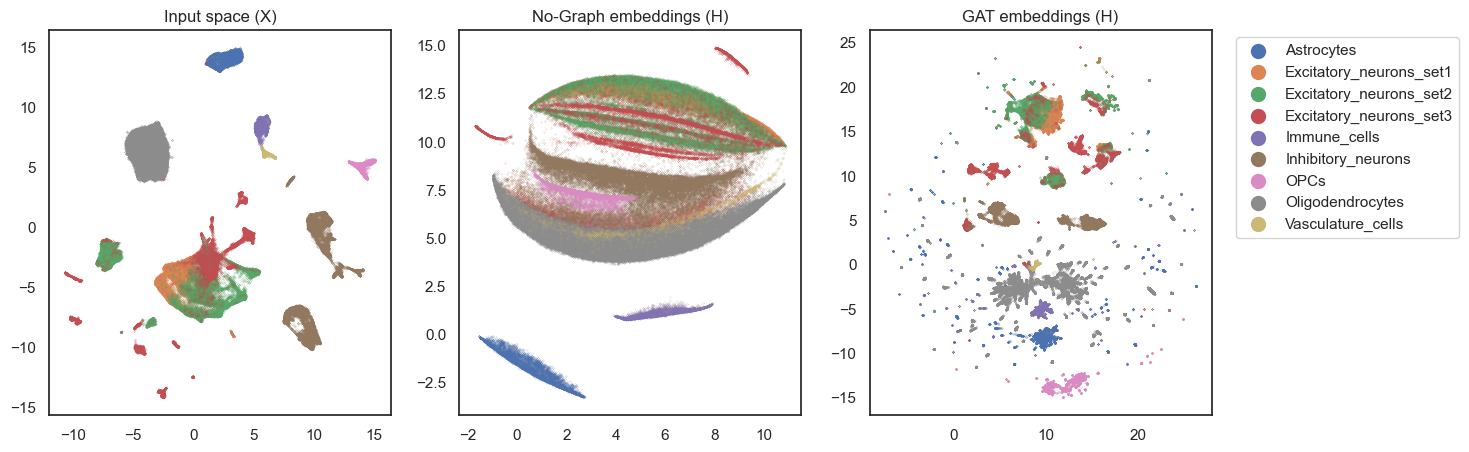

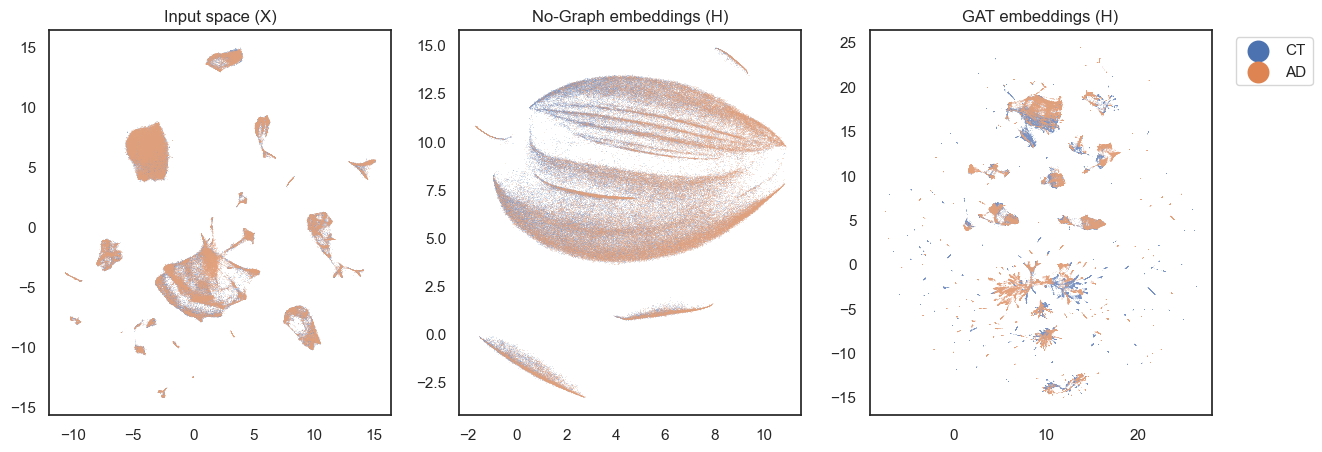

In [17]:
MARKER_SIZE = 0.01

lab_celltype = adata.obs["Supertype"][noint_mask][mask_down]
lab_wang = adata.obs["wang_label"][noint_mask][mask_down].map(lambda x: x.decode("utf-8"))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for celltype in sorted(lab_celltype.unique()):
    mask = lab_celltype == celltype
    axs[0].scatter(x_umap[mask, 0], x_umap[mask, 1], label=celltype, s=MARKER_SIZE)
    axs[1].scatter(h2_umap[mask, 0], h2_umap[mask, 1], label=celltype, s=MARKER_SIZE)
    axs[2].scatter(h2_gat_umap[mask, 0], h2_gat_umap[mask, 1], label=celltype, s=MARKER_SIZE)
axs[0].set_title("Input space (X)")
axs[1].set_title("No-Graph embeddings (H)")
axs[2].set_title("GAT embeddings (H)")
axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=5 / MARKER_SIZE / 5)
plt.show()

MARKER_SIZE = 0.1

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for wang in ["CT", "AD"]:
    mask = lab_wang == wang
    # if wang == "AD":
        # MARKER_SIZE = 0.01
    sns.scatterplot(x=x_umap[mask, 0], y=x_umap[mask, 1], label=wang, s=MARKER_SIZE, ax=axs[0], legend=False)
    sns.scatterplot(x=h2_umap[mask, 0], y=h2_umap[mask, 1], label=wang, s=MARKER_SIZE, ax=axs[1], legend=False)
    sns.scatterplot(x=h2_gat_umap[mask, 0], y=h2_gat_umap[mask, 1], label=wang, s=MARKER_SIZE, ax=axs[2], legend=False)
    # axs[0].scatter(x_umap[mask, 0], x_umap[mask, 1], label=wang, s=MARKER_SIZE)
    # axs[1].scatter(h2_umap[mask, 0], h2_umap[mask, 1], label=wang, s=MARKER_SIZE)
    # axs[2].scatter(h2_gat_umap[mask, 0], h2_gat_umap[mask, 1], label=wang, s=MARKER_SIZE)
axs[0].set_title("Input space (X)")
axs[1].set_title("No-Graph embeddings (H)")
axs[2].set_title("GAT embeddings (H)")
# MARKER_SIZE = 0.1
axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=5 / MARKER_SIZE)
plt.show()